In [1]:
#import sklearn to cluster

import numpy as np
import pandas as pd
import time as tm
import math # to calculate distance between servers

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA # use pca reduce dims
from s_dbw import S_Dbw # evaluate clustering

from matplotlib import pyplot

In [2]:
# 7.1 Computation Time in the US Data

In [3]:
def get_nCluster_cjsTime(data_loc, period='', label_amount=10):
    n_Cluster_record, time_record = [], []
    for n_cluster in [2,3,4,5,6,7,8]:
        for label in range(label_amount):
            if data_loc == 'us':
                file_path = f'./CJS_results/{data_loc}_period_{period}/p2_est_result/n_cluster_{n_cluster}/label_{label}.txt'
            elif period == '':
                file_path = f'./CJS_results/{data_loc}/p2_est_result/n_cluster_{n_cluster}/label_{label}.txt'
            else:
                file_path = f'./CJS_results/{data_loc}/p2_est_result/period_{period}/n_cluster_{n_cluster}/label_{label}.txt'
            with open(file_path) as f:
                lines = f.readlines()
            time_record.append(float(lines[-1][10:]))
            n_Cluster_record.append(n_cluster)
    
    return n_Cluster_record, time_record

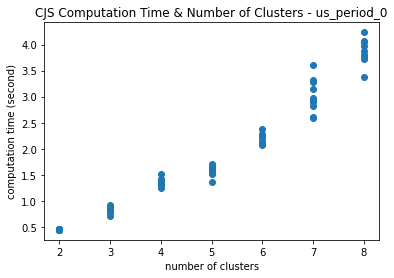

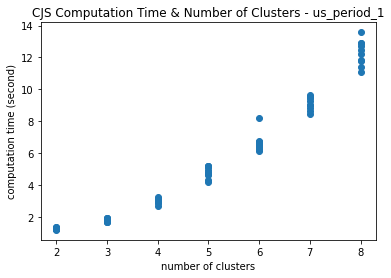

Figure 7.1: Computation Time of K-Means Clustering Results in the US


In [4]:
# Figure 7.1: Computation Time of K-Means Clustering Results in the US

data_loc = 'us'

# us_period_0
us_n_Cluster_record_p0, us_time_record_p0 = get_nCluster_cjsTime(data_loc, period=0)

data_loc_period = 'us_period_0'
pyplot.title(f'CJS Computation Time & Number of Clusters - {data_loc_period}')
pyplot.ylabel('computation time (second)')
pyplot.xlabel('number of clusters')

pyplot.scatter(us_n_Cluster_record_p0, us_time_record_p0)
pyplot.show()

# us_period_1
us_n_Cluster_record_p1, us_time_record_p1 = get_nCluster_cjsTime(data_loc, period=1)

data_loc_period = 'us_period_1'
pyplot.title(f'CJS Computation Time & Number of Clusters - {data_loc_period}')
pyplot.ylabel('computation time (second)')
pyplot.xlabel('number of clusters')

pyplot.scatter(us_n_Cluster_record_p1, us_time_record_p1)
pyplot.show()

print('Figure 7.1: Computation Time of K-Means Clustering Results in the US')

In [5]:
# 7.2 Computation Time in Different Regions

In [11]:
def get_nCluster_time_df(time_record, label_amount=10):
    data_df = pd.DataFrame(columns = ['n_cluster', 'CJS_time'], index=list(range(7*label_amount)))
    for n_cluster in [2,3,4,5,6,7,8]:
        for label in range(label_amount):
            index = (n_cluster-2)*label_amount+label
            data_df['n_cluster'][index] = n_cluster
            data_df['CJS_time'][index] = time_record[(n_cluster-2)*label_amount + label]
    max_time = max(data_df['CJS_time'])
    print(f'max CJS time: {max_time}')
    return data_df

In [9]:
# Table 7.1: Computation Time in the CJS model with K-Means

# the US
data_loc = 'us'
print(f'\ndata_loc: {data_loc}')
n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=0)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_0: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=1)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_1: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

# United Kingdom
data_loc = 'United_Kingdom'
print(f'\ndata_loc: {data_loc}')
n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=0)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_0: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=1)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_1: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

# France
data_loc = 'France'
print(f'\ndata_loc: {data_loc}')
n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period='')
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

# the Netherlands
data_loc = 'Netherlands'
print(f'\ndata_loc: {data_loc}')
n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=0)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_0: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period=1)
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation period_1: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

# Germany
data_loc = 'Germany'
print(f'\ndata_loc: {data_loc}')
n_Cluster_record, time_record = get_nCluster_cjsTime(data_loc, period='')
corr_nCluster_time = np.corrcoef(n_Cluster_record, time_record)
print(f'correlation: {corr_nCluster_time[0][1]}, max time = {np.max(time_record)}')

print('\nTable 7.1: Computation Time in the CJS model with K-Means')


data_loc: us
correlation period_0: 0.9738522091209486, max time = 4.235488
correlation period_1: 0.9707788313379346, max time = 13.5825

data_loc: United_Kingdom
correlation period_0: 0.958828819519588, max time = 6.150258
correlation period_1: 0.9562373820882288, max time = 15.22602

data_loc: France
correlation: 0.9584014516692781, max time = 6.96832

data_loc: Netherlands
correlation period_0: 0.9751296857704521, max time = 8.82272
correlation period_1: 0.9471851601024144, max time = 41.20872

data_loc: Germany
correlation: 0.9585081108065842, max time = 45.15008

Table 7.1: Computation Time in the CJS model with K-Means
